In [1]:
using MKL, LinearAlgebra
using PhysicalUnits
using MoireIVC.LLHF
using MoireIVC.LLED
using MomentumED

In [2]:
using CairoMakie
CairoMakie.activate!()

In [3]:
system = LLHF.define_MoTe2system();
k_index = [
     0;  0;;
    +1;  0;;
     0; +1;;
    -1; +1;;
    -1;  0;;
     0; -1;;
    +1; -1;;
]
E_1 = 5.37meV
# Hmf[k,s,s',kD] c†_{k,s,kD} c_{k,s',kD};
function DiracCone(E_1=E_1, k_index=k_index)
    k_num = size(k_index,2)
    Hmf = zeros(ComplexF64, k_num, 2, 2, 2)
    if k_num == 1
        return Hmf
    elseif k_num == 7

        h1diag = 0.0
        h1offd = E_1
        for i in 1:6
            phase = ((i-1)/3-1/6)*pi
            Hmf[1+i,:,:,1] .=[h1diag;  h1offd*cis(phase);;  h1offd*cis(-phase); h1diag] 
            Hmf[1+i,:,:,2] .=[h1diag; -h1offd*cis(phase);; -h1offd*cis(-phase); h1diag] 
        end

        return Hmf
    else
        #error("k_num should be 0 or 7")
    end
end
Hmf=permutedims(DiracCone(), (3,4,2,1));

### 1. each Dirac point accompanied with 6 k-points

In [4]:
para1 = LLED_init(k_index[:,:], Hmf[:,:,:,:], system, 30, 1);
blocks1, block1_k1, block1_k2, k0number1 = 
    ED_momentum_block_division(para1, ED_mbslist(para1, (7,7));
    momentum_restriction = true, k1range=(-2,2), k2range=(-2,2));
length.(blocks1)

25-element Vector{Int64}:
  82016
 174224
 270848
 313088
 270848
 174224
 313088
 417424
 417424
 313088
      ⋮
 417424
 417424
 313088
 174224
 270848
 313088
 270848
 174224
  82016

In [11]:
int_onebodylist1 = ED_sortedScatteringList_onebody(para1);
int_twobodylist1 = ED_sortedScatteringList_twobody(para1);
length(int_onebodylist1), length(int_twobodylist1)

(18, 712)

##### eigenenergies of blocks with momentum close to zero

In [10]:
N_eigen = 8
eigenenergy = Matrix{Float64}(undef, N_eigen, length(blocks1));
for bn in eachindex(blocks1)
    println(bn, "\t", length(blocks1[bn]))
    vals = EDsolve(blocks1[bn], 
        int_onebodylist1, int_twobodylist1, N_eigen;
        showtime=true, converge_warning = false
    )[1]
    if length(vals) < N_eigen
        eigenenergy[:,bn] .= vcat(vals, fill(NaN, N_eigen - length(vals)))
    else
        eigenenergy[:,bn] .= vals[1:N_eigen]
    end
end

1	82016
  3.329459 seconds (143.75 M allocations: 3.272 GiB, 32.91% gc time)
  5.908270 seconds (12.27 k allocations: 1.861 GiB, 7.27% gc time)
2	174224
  6.359050 seconds (308.24 M allocations: 7.443 GiB, 22.54% gc time)
  7.517536 seconds (7.23 k allocations: 2.306 GiB, 7.88% gc time)
3	270848
 10.370138 seconds (481.72 M allocations: 11.534 GiB, 21.65% gc time)
 14.268914 seconds (8.85 k allocations: 4.344 GiB, 6.83% gc time)
4	313088
 12.302528 seconds (557.42 M allocations: 13.016 GiB, 21.06% gc time)
 11.255014 seconds (5.58 k allocations: 3.164 GiB, 6.71% gc time)
5	270848
 10.407772 seconds (480.65 M allocations: 11.518 GiB, 22.26% gc time)
 14.826734 seconds (9.09 k allocations: 4.465 GiB, 7.35% gc time)
6	174224
  6.657610 seconds (308.10 M allocations: 7.441 GiB, 22.23% gc time)
  7.674491 seconds (7.22 k allocations: 2.306 GiB, 7.87% gc time)
7	313088
 13.691026 seconds (557.98 M allocations: 13.024 GiB, 20.26% gc time)
 11.300586 seconds (5.57 k allocations: 3.164 GiB, 6.8

┌ Warning: Lanczos eigsolve stopped without convergence after 100 iterations:
│ * 4 eigenvalues converged
│ * norm of residuals = (2.82e-28, 0.00e+00, 0.00e+00, 0.00e+00, 4.39e-02, 1.43e-01, 5.60e-05, 1.87e+01)
│ * number of operations = 1179
└ @ KrylovKit C:\Users\zoubo\.julia\packages\KrylovKit\MlUlm\src\eigsolve\lanczos.jl:142


 20.281512 seconds (745.93 M allocations: 18.994 GiB, 18.40% gc time)
 28.703750 seconds (10.05 k allocations: 7.764 GiB, 6.88% gc time)
15	270848
 12.477579 seconds (480.72 M allocations: 11.519 GiB, 21.30% gc time)
 15.177767 seconds (9.08 k allocations: 4.465 GiB, 7.33% gc time)
16	313088
 14.457906 seconds (557.07 M allocations: 13.011 GiB, 20.21% gc time)
 12.238560 seconds (5.80 k allocations: 3.304 GiB, 6.53% gc time)
17	417424
 19.683746 seconds (746.00 M allocations: 18.995 GiB, 19.57% gc time)
 28.645141 seconds (10.49 k allocations: 7.863 GiB, 6.84% gc time)
18	417424
 19.217468 seconds (746.10 M allocations: 18.997 GiB, 20.07% gc time)
 29.859743 seconds (10.49 k allocations: 7.863 GiB, 6.74% gc time)
19	313088
 14.701234 seconds (557.27 M allocations: 13.014 GiB, 20.68% gc time)
 12.029166 seconds (5.81 k allocations: 3.304 GiB, 6.50% gc time)
20	174224
  8.125980 seconds (307.46 M allocations: 7.432 GiB, 24.32% gc time)
  8.268320 seconds (7.47 k allocations: 2.384 GiB, 7

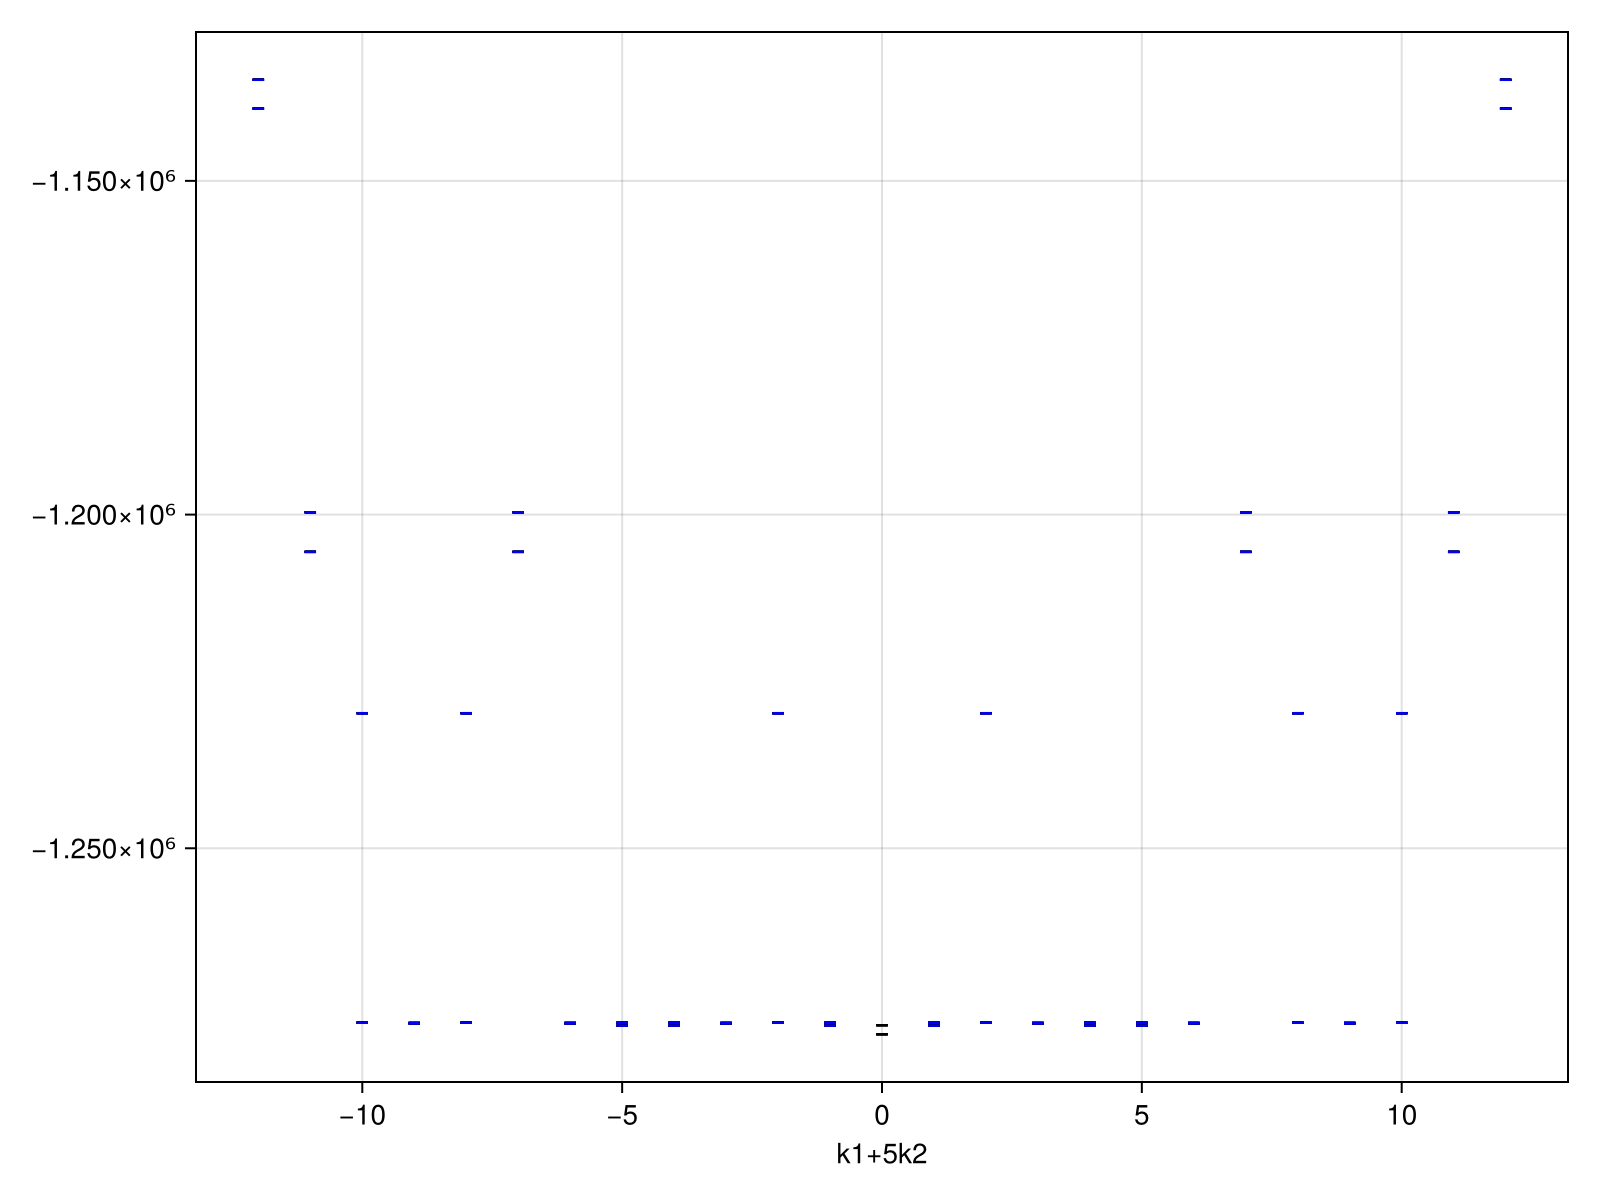

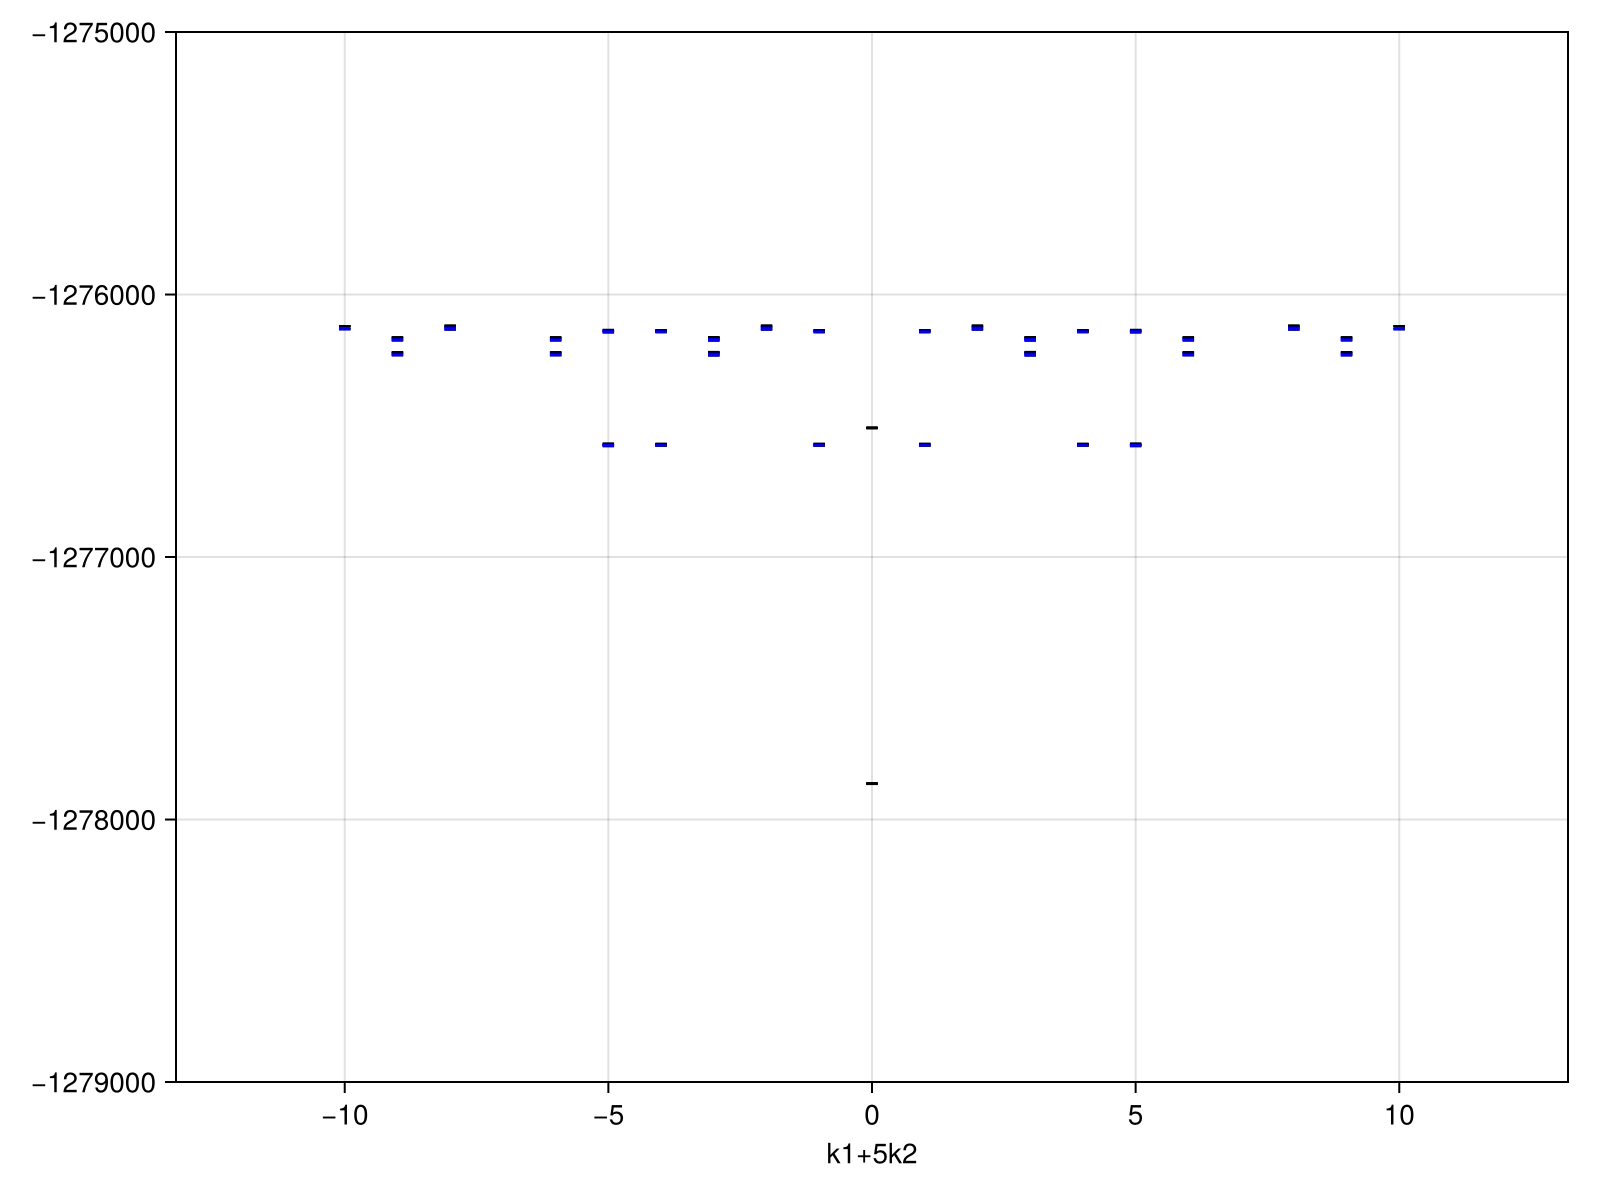

8-element Vector{Float64}:
 -17.579360177721274
 -17.5793601774588
 -17.579327984362536
 -17.579327984100257
 -17.560715232527087
 -17.560715232132523
 -17.560698934941726
 -17.560679921458714

In [22]:
# plot eigenenergies of blocks
eigEs = Figure(size = (800,600));
ax = Axis(eigEs[1,1],
    xlabel = "k1+5k2",
)
for bn in eachindex(blocks1)
    k1 = block1_k1[bn]; k2 = block1_k2[bn]
    xticknumber = k1 + 5k2
    energy_shift = E_1 * sqrt(k1^2 + k2^2 + k1*k2)
    for j in 1:N_eigen
        if !isnan(eigenenergy[j, bn])
            scatter!(ax, xticknumber, eigenenergy[j, bn];
                color=:black, marker=:hline
            )
            if xticknumber != 0
                scatter!(ax,xticknumber,eigenenergy[j,bn]-energy_shift;
                    color=:blue, marker=:hline
                )
            end
        end
    end
end
display(eigEs)
ylims!(ax, -1279000, -1275000)
display(eigEs)
eigenenergy[:,13] ./ 30^2 ./ system.W0


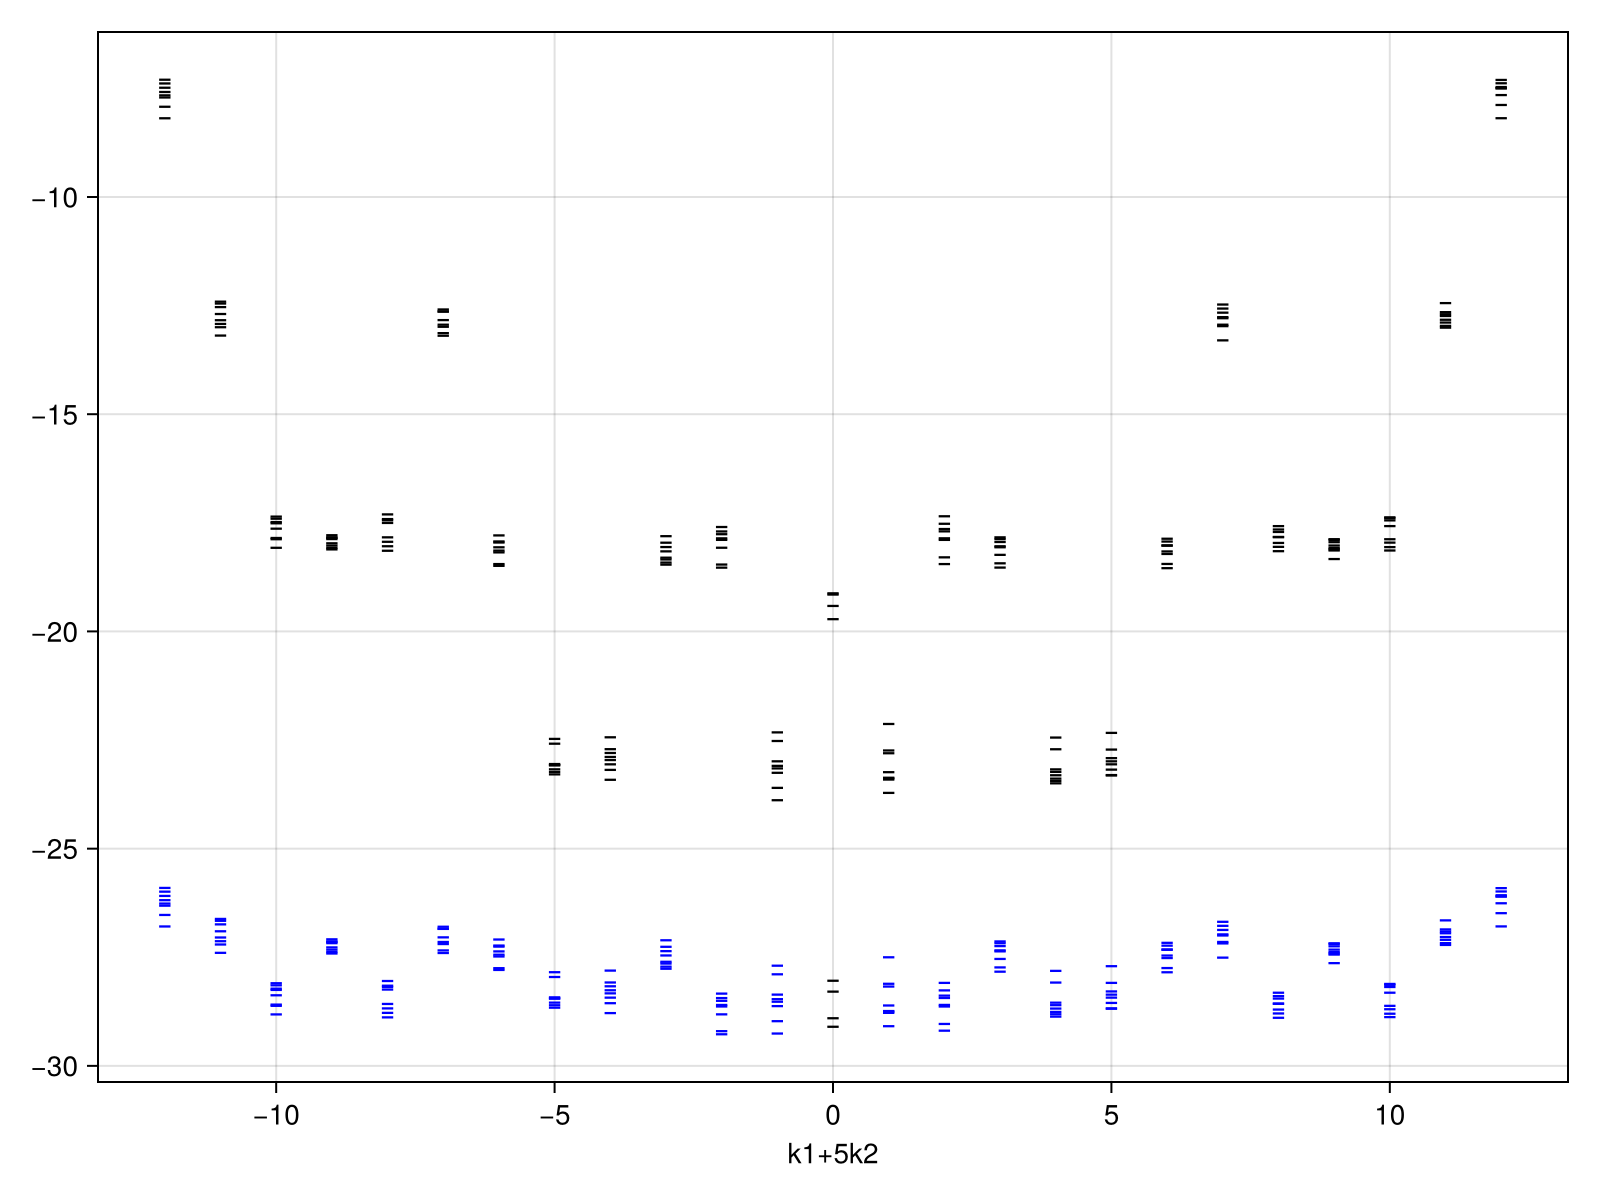

In [7]:
# plot eigenenergies of blocks
eigEs = Figure(size = (800,600));
ax = Axis(eigEs[1,1],
    xlabel = "k1+5k2",
)
for bn in eachindex(blocks1)
    k1 = block_k1_1[bn]; k2 = block_k2_1[bn]
    xticknumber = k1 + 5k2
    energy_shift = E_1 * sqrt(k1^2 + k2^2 + k1*k2)
    for j in 1:N_eigen
        if !isnan(eigenenergy[j, bn])
            scatter!(ax, xticknumber, eigenenergy[j, bn];
                color=:black, marker=:hline
            )
            if xticknumber != 0
                scatter!(ax,xticknumber,eigenenergy[j,bn]-energy_shift;
                    color=:blue, marker=:hline
                )
            end
        end
    end
end
eigEs

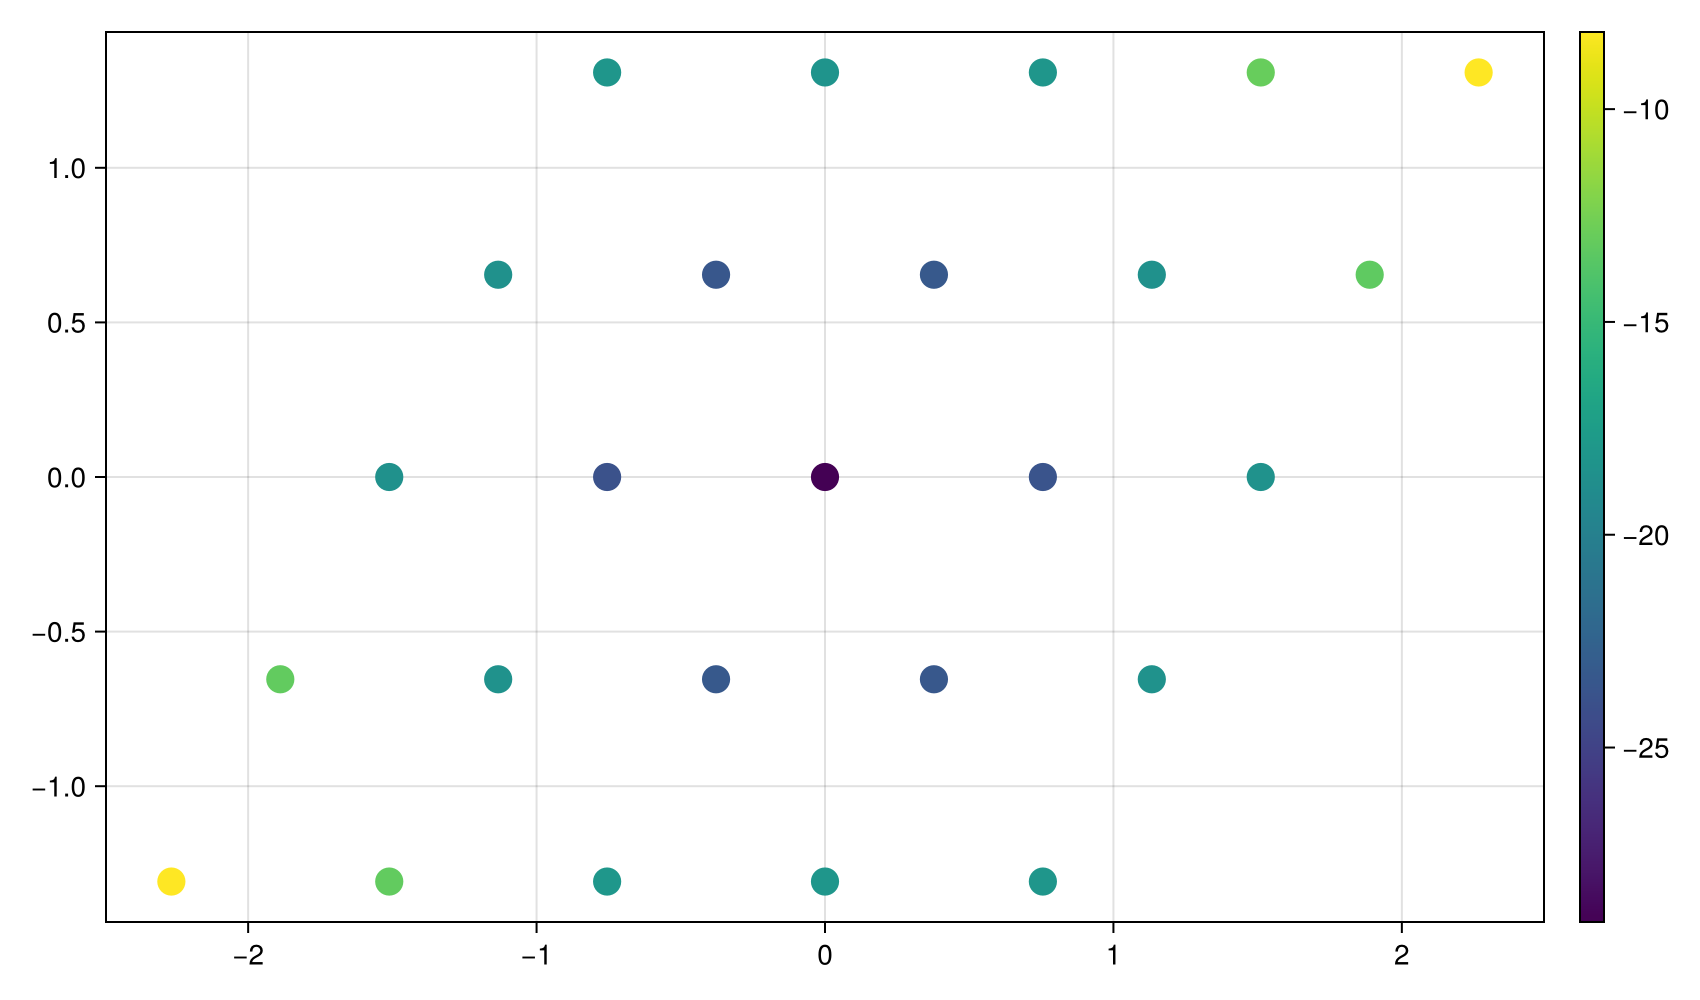

In [12]:
# ground state energy (color) vs. block momentum
lowest_E = Figure(size = (850,500));
ax_le = Axis(lowest_E[1,1])
Emin = Base.vec(eigenenergy[1,:])
block_kx = block_k1_1 .* system.G1[1] + block_k2_1 .* system.G2[1]
block_ky = block_k1_1 .* system.G1[2] + block_k2_1 .* system.G2[2]
sc = scatter!(ax_le, block_kx, block_ky;
    color = Emin, markersize = 20
)
Colorbar(lowest_E[1,2], sc)
lowest_E

##### calculate and analysis the k=0 eigenwavefunctions

In [5]:
@time H_k0 = LLED_Block_Hamiltonian(blocks1[bn0_1], int_list1, para1)
@show ishermitian(H_k0)
@time vals_k0, vecs_k0 = LLED_solve(H_k0, 10);
@show vals_k0
dot(vecs_k0[1], vecs_k0[2])

100 200 300 400 500 600 700 800 900 1000  34.457370 seconds (164.45 M allocations: 18.788 GiB, 15.30% gc time, 2.47% compilation time)
ishermitian(H_k0) = true
 58.689439 seconds (13.97 M allocations: 10.762 GiB, 4.09% gc time, 7.98% compilation time)
vals_k0 = [-29.099376832572755, -28.90335041224904, -28.290788006334598, -28.04015391875575, -19.7178445167384, -19.41353023848074, -19.15128448523059, -19.122788764141873, -18.982920944084714, -18.758693606345346]


-9.27776193544727e-15 - 1.3769367590565906e-17im

tr(onebodyRDM) / 14 = 0.9975290147093451 + 0.0im
maximum(abs.(onebodyRDM)) = 0.9758729433933472


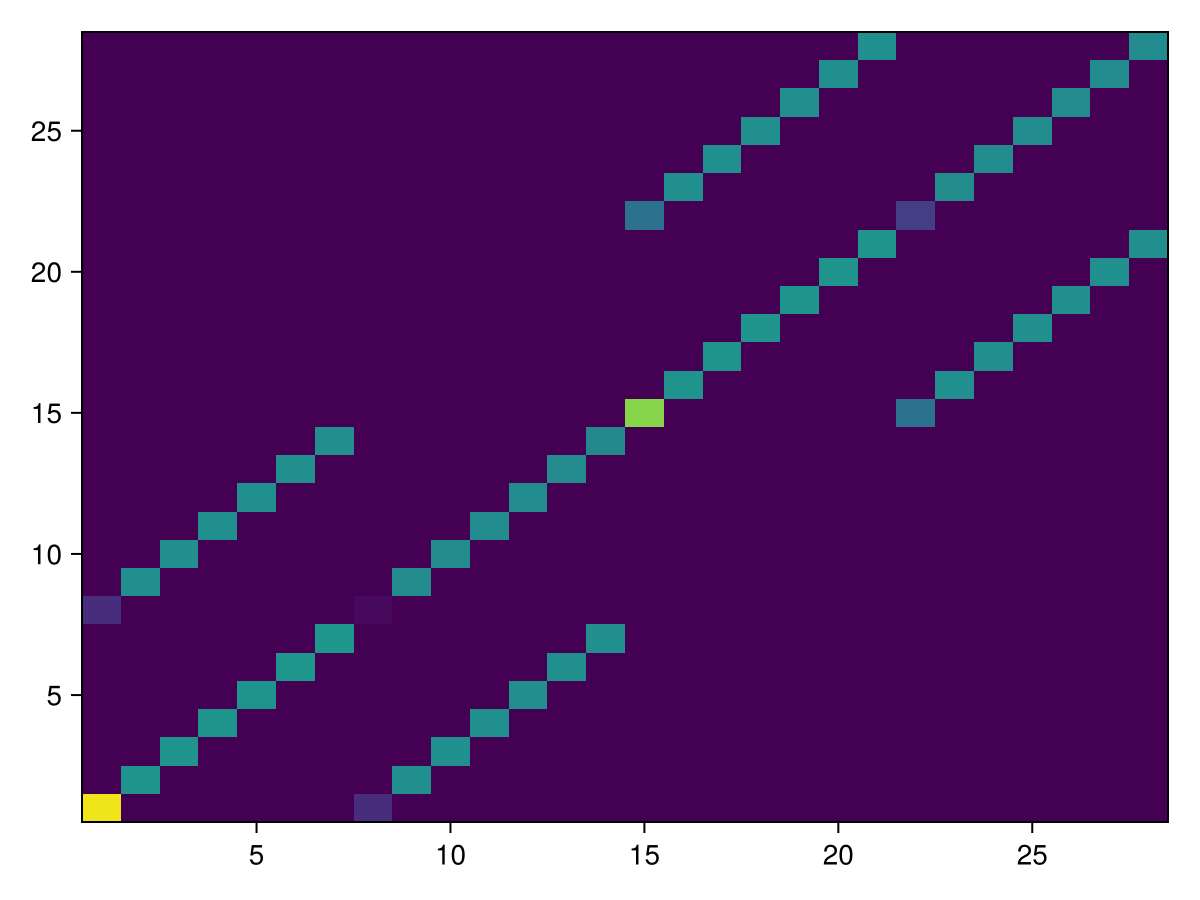

In [6]:
# one-body reduced density matrix
vec0 = vecs_k0[3]
onebodyRDM = LLED.one_body_reduced_density_matrix(vec0,blocks1[bn0_1])
@show tr(onebodyRDM)/14
@show maximum(abs.(onebodyRDM))
heatmap(abs.(onebodyRDM), colorrange = (0,1))

In [7]:
# reduced density matices and entanglement entropies
vec0 = vecs_k0[1]

# 1. Dirac point 1
using Combinatorics
iA1 = [0;7];
nA1 = (i_set -> sum(1 .<< i_set; init = 0)).(collect(powerset(iA1)));
RDM_1 = LLED.reduced_density_matrix(vec0, blocks1[bn0_1], nA1, iA1);
@show entropy1 = LLED.entanglement_entropy(RDM_1)
# 2. Dirac point 2
iA2 = [14;21];
nA2 = (i_set -> sum(1 .<< i_set; init = 0)).(collect(powerset(iA2)));
RDM_2 = LLED.reduced_density_matrix(vec0, blocks1[bn0_1], nA2, iA2);
@show entropy2 = LLED.entanglement_entropy(RDM_2)
# 3. two Dirac points
iA3 = [0;7;14;21];
nA3 = (i_set -> sum(1 .<< i_set; init = 0)).(collect(powerset(iA3)));
RDM_3 = LLED.reduced_density_matrix(vec0, blocks1[bn0_1], nA3, iA3);
@show entropy3 = LLED.entanglement_entropy(RDM_3)
# 4. all k-points near Dirac point 1
iA4 = collect(0:13);
nA4 = getfield.(LLED.mbslist_oneDiracCone(para1, 7), :n);
RDM_4 = LLED.reduced_density_matrix(vec0, blocks1[bn0_1], nA4, iA4);
@show entropy4 = LLED.entanglement_entropy(RDM_4)

entropy1 = LLED.entanglement_entropy(RDM_1) = 0.13913781362943067
entropy2 = LLED.entanglement_entropy(RDM_2) = 0.3914623408589726
entropy3 = LLED.entanglement_entropy(RDM_3) = 0.4944224299329179
entropy4 = LLED.entanglement_entropy(RDM_4) = 0.08432833915178345


0.08432833915178345

### 2. only the two Dirac points

In [8]:
para2 = LLED_init(k_index[:,[1]], Hmf[[1],:,:,:], system, 30, 1);
blocks2 = 
LLED_block_bysmallmomentum(LLED_mbslist_twoDiracCone(para2, 1, 1);
    momentum_restriction = false
)[1]
int_list2 = LLED_interactionlist(para2)
@show H2_k0 = LLED_Block_Hamiltonian(blocks2[1], int_list2, para2)
@show vals2_k0, vecs2_k0 = eigen(Matrix(H2_k0))

H2_k0 = LLED_Block_Hamiltonian(blocks2[1], int_list2, para2) = sparse([1, 2, 3, 2, 3, 4], [1, 2, 2, 3, 3, 4], ComplexF64[0.47131726944454044 + 0.0im, 0.5402690172289842 + 0.0im, -0.013909728774944955 + 6.098677750417114e-34im, -0.013909728774944955 - 6.098677750417114e-34im, 0.5402690172289842 + 0.0im, 0.47131726944454044 + 0.0im], 4, 4)
(vals2_k0, vecs2_k0) = eigen(Matrix(H2_k0)) = Eigen{ComplexF64, Float64, Matrix{ComplexF64}, Vector{Float64}}([0.47131726944454044, 0.47131726944454044, 0.5263592884540393, 0.5541787460039292], ComplexF64[1.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im -0.7071067811865477 - 3.1002879088190756e-32im -0.7071067811865475 - 3.1002879088190745e-32im; 0.0 + 0.0im 0.0 + 0.0im -0.7071067811865475 - 0.0im 0.7071067811865476 - 0.0im; 0.0 + 0.0im 1.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im])



Eigen{ComplexF64, Float64, Matrix{ComplexF64}, Vector{Float64}}
values:
4-element Vector{Float64}:
 0.47131726944454044
 0.47131726944454044
 0.5263592884540393
 0.5541787460039292
vectors:
4×4 Matrix{ComplexF64}:
 1.0+0.0im  0.0+0.0im        0.0+0.0im                0.0+0.0im
 0.0+0.0im  0.0+0.0im  -0.707107-3.10029e-32im  -0.707107-3.10029e-32im
 0.0+0.0im  0.0+0.0im  -0.707107-0.0im           0.707107-0.0im
 0.0+0.0im  1.0+0.0im        0.0+0.0im                0.0+0.0im

In [9]:
vec0 = vecs2_k0[:,2];
iA = [0;1]; nA = [1;2];
RDM_A = LLED.reduced_density_matrix(vec0, blocks2[1], nA, iA);
entropy = LLED.entanglement_entropy(RDM_A)

0.0